<a href="https://colab.research.google.com/github/Pratik972/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [2]:
# Importing libraries for data handling
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

# Feature Engineering libraries
from sklearn.model_selection import train_test_split 
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Model Selection and Metrics libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

In [3]:
# Mounting of Device 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# path to csv file
path ='/content/drive/MyDrive/ML Project/Health insurance/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'

In [5]:
# loding of Data
df=pd.read_csv(path)

# **Data** **Summary**

In [6]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [8]:
# Size of dataset
df.shape

(381109, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


*   As per the above observations no null values 

*  Dataset consists of 381109 rowes and 12 columns 

In [10]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
# check uniqe value of features
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [12]:
# cheking duplicates
df.duplicated().sum()

0

NO duplicates value in the data set

# **Exploratory** **Data** **Analysis**

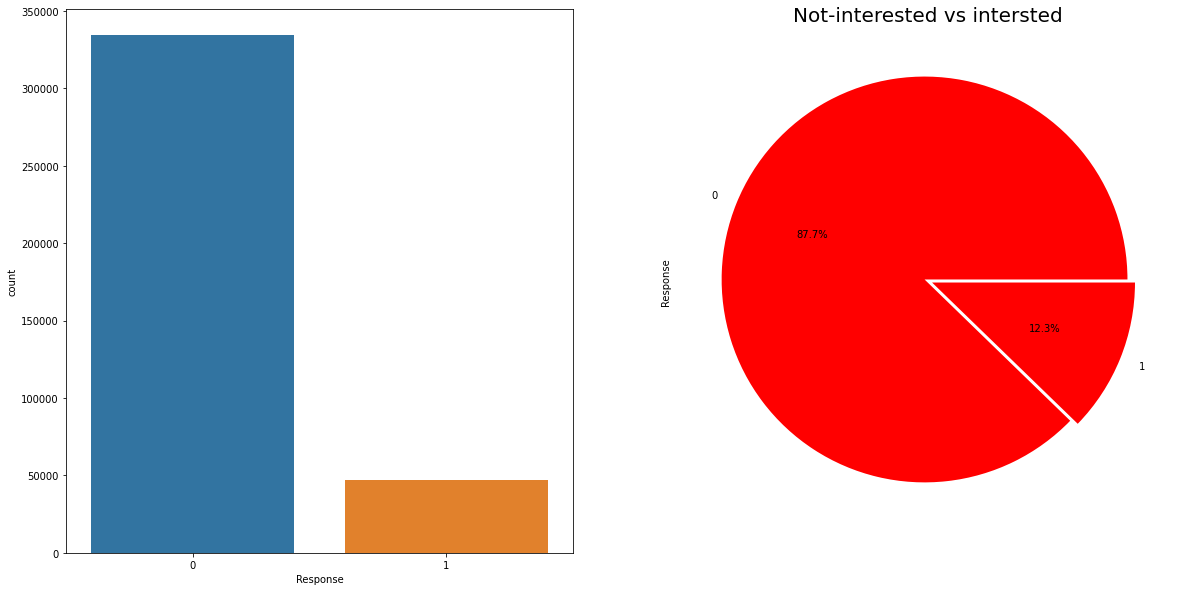

In [13]:
# Target variable responce 0 = not intersted & 1 = intersted in insurance
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
sns.countplot(df['Response'],data=df,ax=axes[0])
plt.title('Not-interested vs intersted',fontsize=20)
df['Response'].value_counts().plot.pie(autopct = '%.1f%%',ax = axes[1],explode = [0.02,0.02],colors='r')
plt.show()

The dataset is an imbalance problem the value of variable 1 is significantly lower than zero.

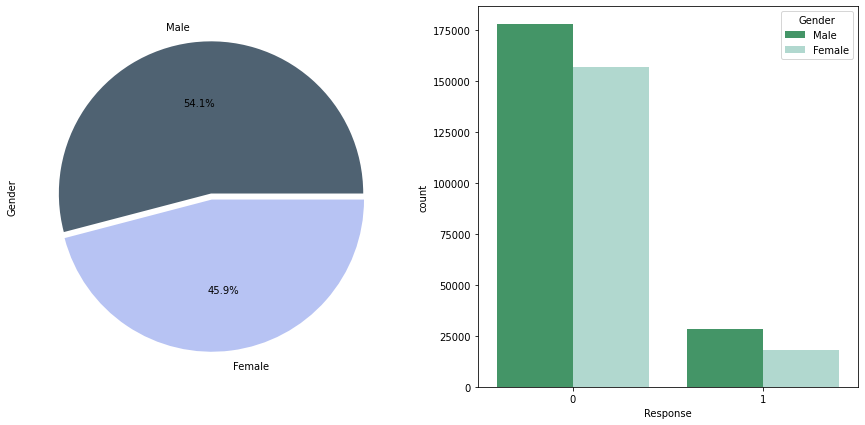

In [14]:
# Analyzing Gender feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
df['Gender'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = df , x = 'Response', ax = axes[1],palette = 'BuGn_r', hue = 'Gender',)

Male category is somewhat more noteworthy than that of female and chances of purchasing the insurance is likewise minimal high

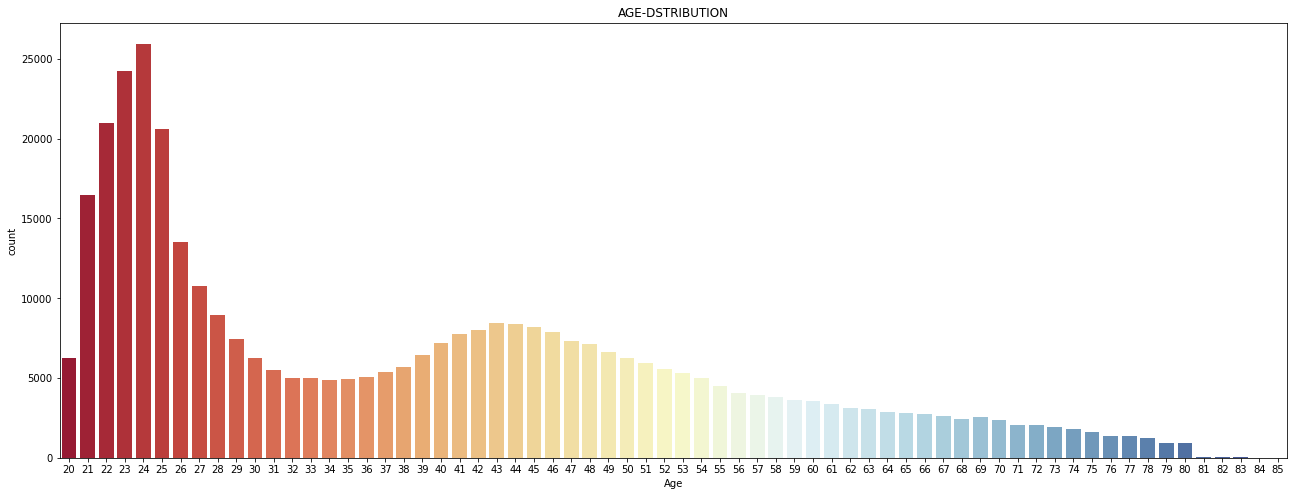

In [15]:
# Analysis of age 
plt.figure(figsize=(22,8))
sns.countplot(df['Age'],palette='RdYlBu')
plt.title("AGE-DSTRIBUTION")
plt.show()

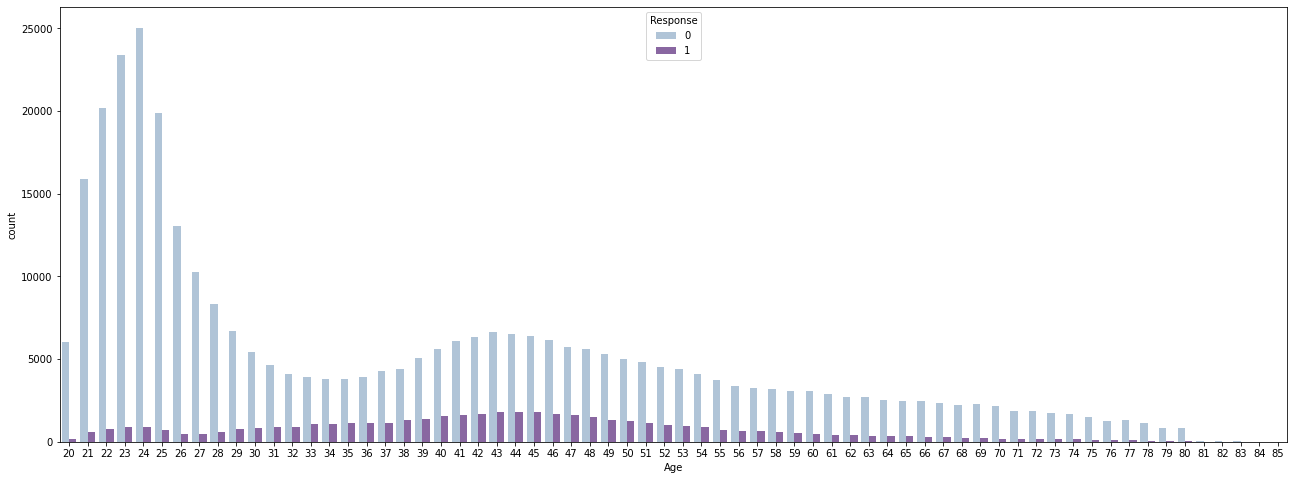

In [16]:
# Analysis of Age & Response
plt.figure(figsize=(22,8))
ax = sns.countplot(data = df , x = 'Age', palette = 'BuPu', hue = 'Response',)

*   Youngsters under 30 are not intrigued by vehicle insurance. Reasons could be absence of involvement, less awareness about insurance and they may not have costly vehicles yet.

*    People of age range between 30-60 years are more likely to be interested and willing to purchase


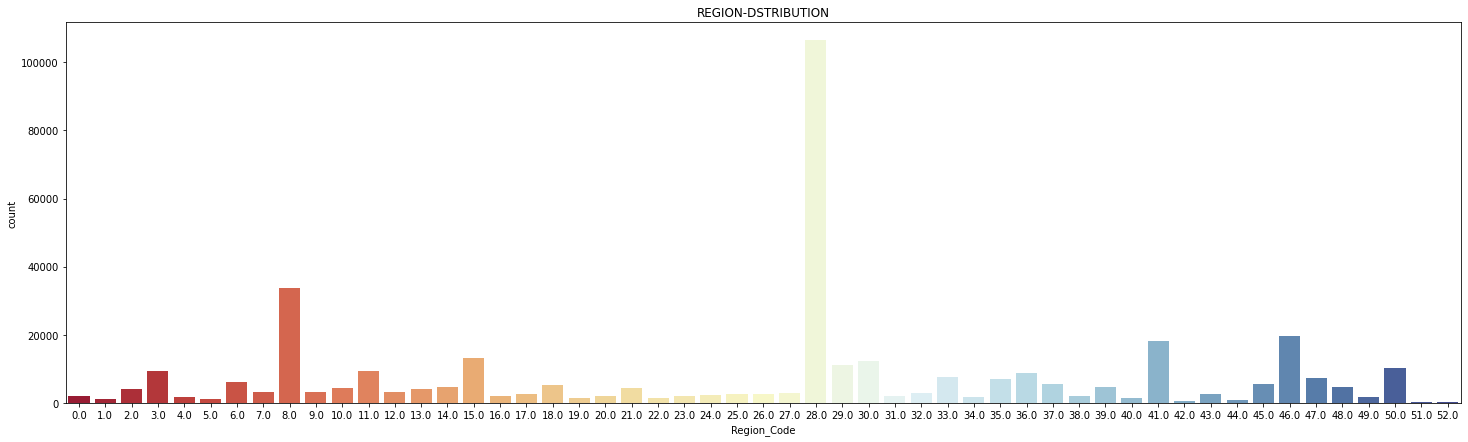

In [17]:
# Analyzing regoin feature
plt.figure(figsize=(25,7))
sns.countplot(df['Region_Code'],palette='RdYlBu')
plt.title("REGION-DSTRIBUTION")
plt.show()

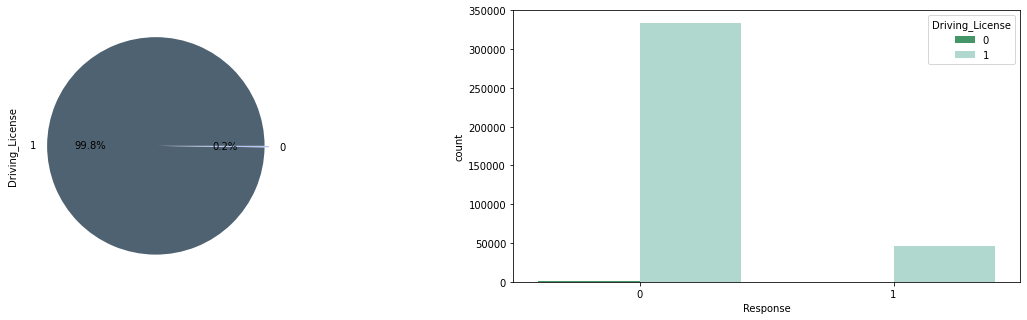

In [18]:
# Driving License effect on response feature
fig,axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#4F6272','#B7C3F3']
df['Driving_License'].value_counts().plot.pie(autopct='%.1f%%',ax= axes[0],explode=[0.02,0.02],colors=colors)
ax = sns.countplot(data = df , x = 'Response', ax = axes[1],palette = 'BuGn_r', hue = 'Driving_License',)



*   We can see that if there is a license holder that it will be more likely to buy an insurance
*   Also there is very less count of people who donot have driving license


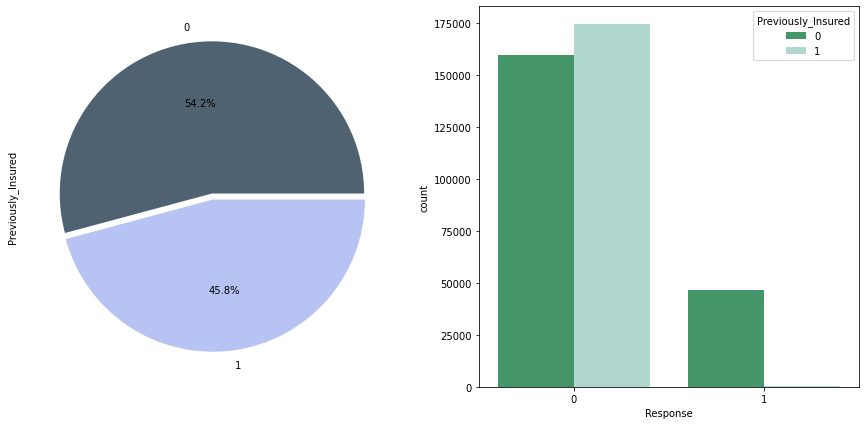

In [19]:
# Analyzing Previously_Insured feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
df['Previously_Insured'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = df , x = 'Response', ax = axes[1],palette = 'BuGn_r', hue = 'Previously_Insured',)

more than 50% of people doesn't have insurance


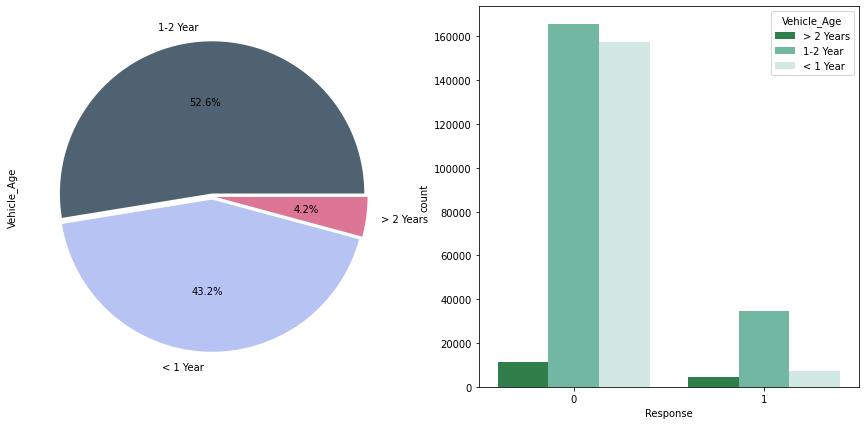

In [20]:
# Analyzing Vehicle Age feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
df['Vehicle_Age'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = df , x = 'Response', ax = axes[1],palette = 'BuGn_r', hue = 'Vehicle_Age',)



*   consumers with 1-2-year-old vehicles are more interested as compared to others
*  consumers with less than 1 year old vehicles have less chance of buying insurance


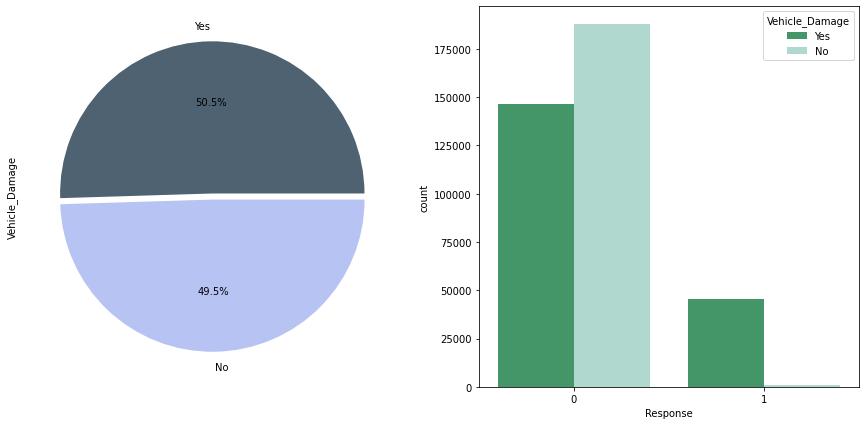

In [21]:
# Analyzing Vehicle_Damage feature and it's effect on response feature
fig, axes = plt.subplots(ncols=2,figsize=(20,5))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
df['Vehicle_Damage'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[0],explode = [0.02,0.02],colors=colors, figsize=(15,7))
ax = sns.countplot(data = df , x = 'Response', ax = axes[1],palette = 'BuGn_r', hue = 'Vehicle_Damage',)

Half of all health insurance customers have had their car destroyed, while the other half have not

# **Multivariate Analysis**

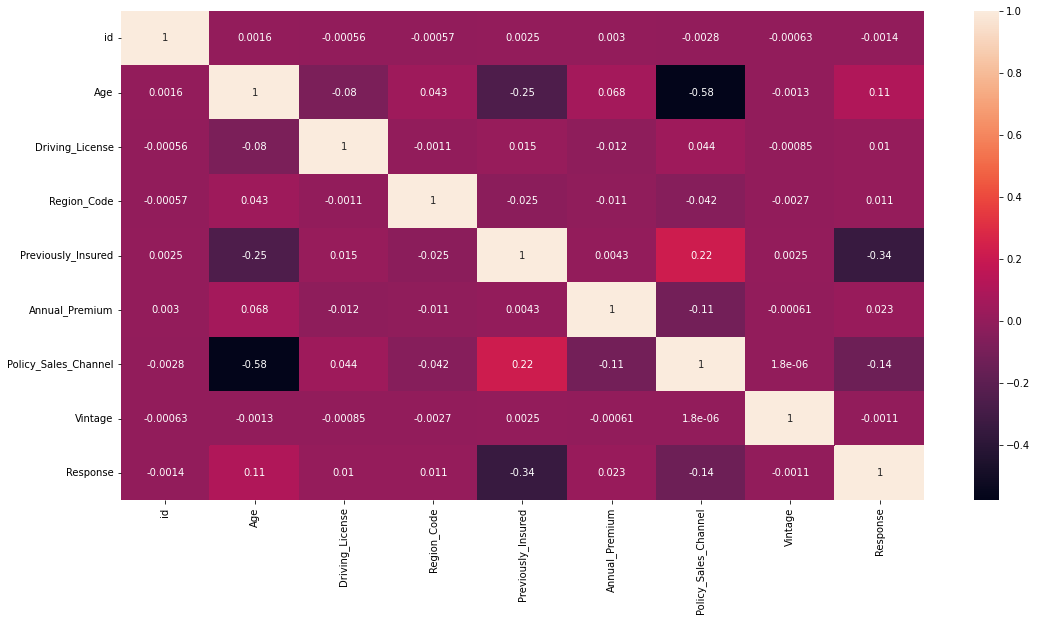

In [22]:
# plot heatmap to find correlation 
plt.figure(figsize=(18,9))
ax= sns.heatmap(df.corr(),annot=True)

There is no strong correlation among features as we can see from the above heatmap

# **Cheking for Outliers**

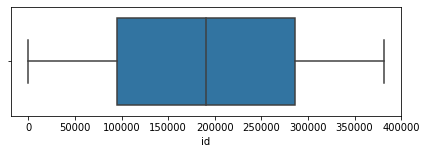

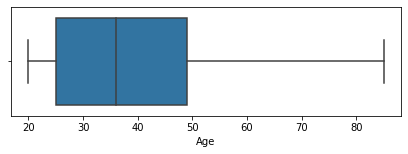

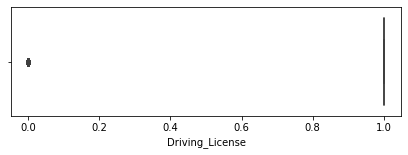

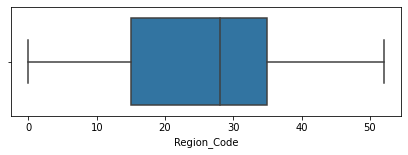

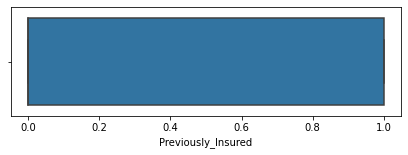

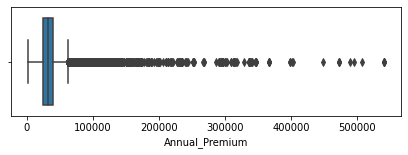

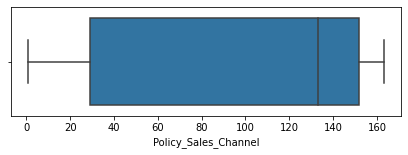

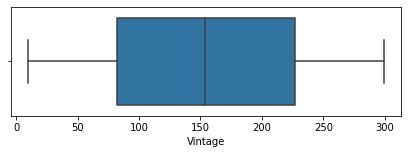

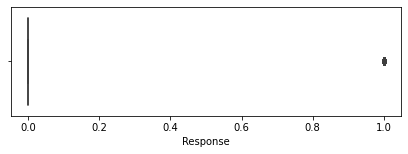

In [23]:
# chaking outliers 
int_df = df[list(df.describe())]
for column in int_df:
  plt.figure(figsize=(7,2))
  sns.boxplot(data=int_df,x=column)

Annual premiume feature contains outliers so we tranfrom annual premium to normal distribution

In [24]:
features=df[['Annual_Premium']]

In [25]:
#instatiate 
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True,) 

skl_yeojohnson = pt.fit(features)

print (skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_ 
skl_yeojohnson = pt.transform(features) 
df['Annual_Premium'] = pd.DataFrame(data=skl_yeojohnson, columns=['Annual_Premium'])

df['Annual_Premium']

[0.76692882]


0         0.612207
1         0.243028
2         0.498644
3        -0.030214
4        -0.094107
            ...   
381104    0.057079
381105    0.589296
381106    0.328903
381107    0.827191
381108    0.681065
Name: Annual_Premium, Length: 381109, dtype: float64

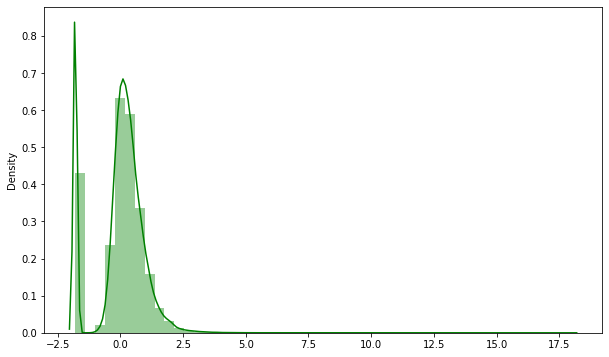

In [26]:
fig=plt.subplots(figsize= (10,6))
sns.distplot(x=df['Annual_Premium'], color='g')

we will drop id columns as it has not attribute

In [27]:
df.drop('id',axis=1,inplace=True)

In [28]:
df.shape

(381109, 11)

In [29]:
# encoding numarical column to categorcial
le = LabelEncoder()
ohe = OneHotEncoder()
 
df["Vehicle_Age"]=df["Vehicle_Age"].map({"> 2 Years":2,"1-2 Year":1,"< 1 Year":0})

df['Gender']=ohe.fit_transform(df[["Gender"]]).toarray()
df['Vehicle_Age'] =le.fit_transform(df[['Vehicle_Age']])
df['Vehicle_Damage'] = le.fit_transform(df[['Vehicle_Damage']])

In [30]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0.0,44,1,28.0,0,2,1,0.612207,26.0,217,1
1,0.0,76,1,3.0,0,1,0,0.243028,26.0,183,0
2,0.0,47,1,28.0,0,2,1,0.498644,26.0,27,1
3,0.0,21,1,11.0,1,0,0,-0.030214,152.0,203,0
4,1.0,29,1,41.0,1,0,0,-0.094107,152.0,39,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  float64
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 32.0 MB


# **Feature Selection**

In [32]:
# Importing iportant libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Function to Calculate VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [33]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Response']]])

,variables,VIF
0,Gender,1.900420
1,Age,18.381724
2,Driving_License,40.268862
3,Region_Code,4.957160
4,Previously_Insured,5.724299
5,Vehicle_Age,6.034246
6,Vehicle_Damage,6.351624
7,Annual_Premium,1.014392
8,Policy_Sales_Channel,8.107759
9,Vintage,4.373705


In [34]:
# drop driving licen variable
df=df.drop(['Driving_License'],axis=1)

In [35]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Response']]])

,variables,VIF
0,Gender,1.847842
1,Age,13.471196
2,Region_Code,4.558850
3,Previously_Insured,4.620188
4,Vehicle_Age,6.023186
5,Vehicle_Damage,5.186692
6,Annual_Premium,1.013756
7,Policy_Sales_Channel,5.217964
8,Vintage,4.066432


After dropping driving licence we got good scores

### **Handling Imbalance**

In [36]:
X=df.drop(['Response'],axis=1) #contain all  independent variable
y=df['Response']           #dependent variable

In [37]:
# importing libraries for resampling
# Handling imbalance data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)
print('Original dataset shape', len(df))
print('Resampled dataset shape',len(y))

Original dataset shape 381109
Resampled dataset shape 668798


In [38]:
X.shape

(668798, 9)

# **Train-test split**

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.20,random_state = 10)

In [40]:
y_train.value_counts()

1    267521
0    267517
Name: Response, dtype: int64

In [41]:
y_test.value_counts()

0    66882
1    66878
Name: Response, dtype: int64

# **Model**

# Logistic Regression

In [42]:
# Model of logistic regression
LOG_RE=LogisticRegression()
LOG_RE=LOG_RE.fit(X_train,y_train)
LOG_RE_pred=LOG_RE.predict(X_test)
LOG_RE_probability =LOG_RE.predict_proba(X_test)[:,1]

# evaluating the model on the following metrics.
accu_logreg = accuracy_score(y_test,LOG_RE_pred)
recall_logreg = recall_score(y_test,LOG_RE_pred)
prec_logreg = precision_score(y_test,LOG_RE_pred)
f1score_logreg=f1_score(y_test,LOG_RE_pred)

#print accuracy ,classification report and confusion matrix  values of model.
print("Accuracy : ", accuracy_score(y_test,LOG_RE_pred)*100)
print(classification_report(y_test,LOG_RE_pred))

matrix = confusion_matrix(y_test,LOG_RE_pred)
print('Confusion matrix : \n',matrix)


Accuracy :  77.76988636363636
              precision    recall  f1-score   support

           0       0.94      0.59      0.73     66882
           1       0.70      0.96      0.81     66878

    accuracy                           0.78    133760
   macro avg       0.82      0.78      0.77    133760
weighted avg       0.82      0.78      0.77    133760

Confusion matrix : 
 [[39538 27344]
 [ 2391 64487]]


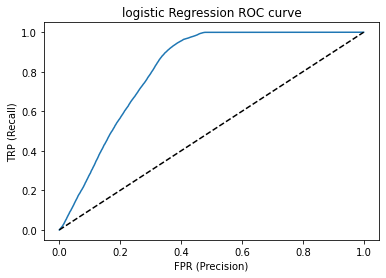

In [43]:
# import ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,LOG_RE_probability)

plt.title("logistic Regression ROC curve")
plt.xlabel('FPR (Precision)')
plt.ylabel("TRP (Recall)")

# Performance metrics
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[39538 27344]
 [ 2391 64487]]


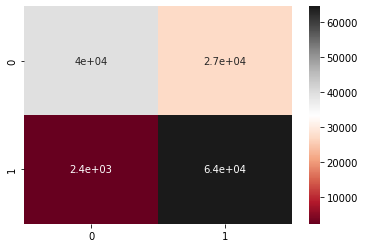

In [44]:
# Confusion matrix
cm=confusion_matrix(y_test,LOG_RE_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdGy')

# **Decision tree**

In [45]:
# Creating instance for our model, fiting and predicitng
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_probability =dtree.predict_proba(X_test)[:,1]

# evaluating the model on the following metrics.
accu_dtree = accuracy_score(y_test,dtree_pred)
recall_dtree = recall_score(y_test,dtree_pred)
prec_dtree = precision_score(y_test,dtree_pred)
f1score_dtree=f1_score(y_test,dtree_pred)


#print accuracy ,classification report and confusion matrix  values of model.

print(accuracy_score(y_test, dtree_pred)*100)
print(classification_report(y_test, dtree_pred))

print('Confusion matrix : \n',confusion_matrix(y_test,dtree_pred, labels=[1,0]))

87.19946172248804
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     66882
           1       0.86      0.88      0.87     66878

    accuracy                           0.87    133760
   macro avg       0.87      0.87      0.87    133760
weighted avg       0.87      0.87      0.87    133760

Confusion matrix : 
 [[59129  7749]
 [ 9373 57509]]


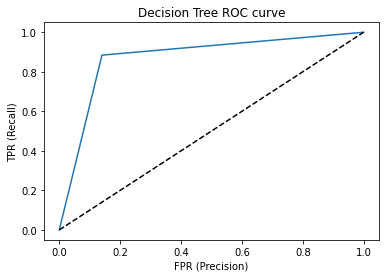

In [46]:
# Analyze Performance 
from sklearn.metrics import roc_curve
fpr,tpr, _ = roc_curve(y_test,dtree_probability)

plt.title('Decision Tree ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[57509  9373]
 [ 7749 59129]]


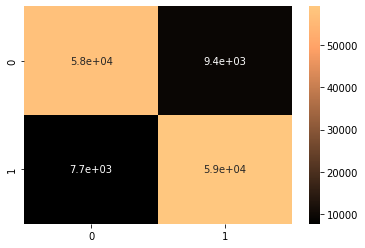

In [47]:
# Confusion matrix useful to find how many values are classified correctly
cm=confusion_matrix(y_test,dtree_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='copper')

# **Random** **Forest** **classifier**

In [48]:
# Creating instance for our model, fiting and predicitng
rf_tree = RandomForestClassifier()
rf_tree.fit(X_train, y_train)
rf_tree_pred = rf_tree.predict(X_test)
rf_tree_probability = rf_tree.predict_proba(X_test)[:,1]

# evaluating the model on the following metrics.
accu_rf= accuracy_score(y_test,rf_tree_pred)
recall_rf = recall_score(y_test,rf_tree_pred)
prec_rf= precision_score(y_test,rf_tree_pred)
f1score_rf=f1_score(y_test,rf_tree_pred)

#print accuracy ,classification report and confusion matrix  values of model.

print(accuracy_score(y_test, rf_tree_pred)*100)
print(classification_report(y_test, rf_tree_pred))
print("Confusion matrix\n", confusion_matrix(y_test, rf_tree_pred))

89.58433014354067
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     66882
           1       0.88      0.92      0.90     66878

    accuracy                           0.90    133760
   macro avg       0.90      0.90      0.90    133760
weighted avg       0.90      0.90      0.90    133760

Confusion matrix
 [[58368  8514]
 [ 5418 61460]]


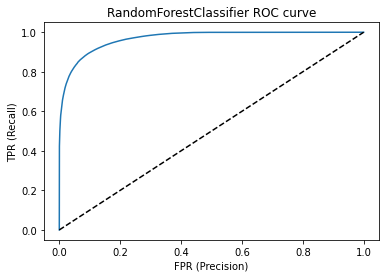

In [49]:
# Analyze Performance 
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,rf_tree_probability )

plt.title('RandomForestClassifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[58368  8514]
 [ 5418 61460]]


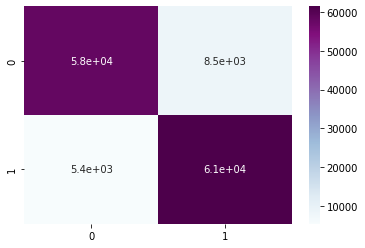

In [50]:
# Confusion matrix useful to find how many values are classified correctly
cm=confusion_matrix(y_test,rf_tree_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# **XGB Classifier**

In [51]:
# Importing of XGBClassifier
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_model_probability = xgb_model.predict_proba(X_test)[:,1]

# evaluating the model on the following metrics.
accu_xgb = accuracy_score(y_test,xgb_pred)
recall_xgb = recall_score(y_test,xgb_pred)
prec_xgb = precision_score(y_test,xgb_pred)
f1score_xgb=f1_score(y_test,xgb_pred)

#print accuracy ,classification report and confusion matrix  values of model.

print(accuracy_score(y_test, xgb_pred)*100)
print(classification_report(y_test, xgb_pred))
print("Confusion matrix\n", confusion_matrix(y_test, xgb_pred))

84.19407894736842
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     66882
           1       0.80      0.91      0.85     66878

    accuracy                           0.84    133760
   macro avg       0.85      0.84      0.84    133760
weighted avg       0.85      0.84      0.84    133760

Confusion matrix
 [[52030 14852]
 [ 6290 60588]]


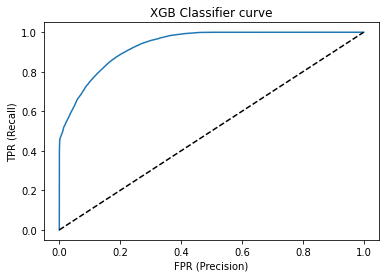

In [52]:
# performance and evaluation
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,xgb_model_probability)

plt.title('XGB Classifier curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[52030 14852]
 [ 6290 60588]]


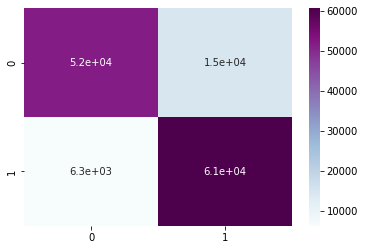

In [53]:
# Confusion matrix useful to find how many values are classified correctly
cm=confusion_matrix(y_test,xgb_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# **Comparing models**

In [54]:
ind=['Logistic regression','Decision Tree','Randomforest','XGBClassifier']
df={"Accuracy":[accu_logreg,accu_dtree,accu_rf,accu_xgb],"Recall":[recall_logreg,recall_dtree,recall_rf,recall_xgb],"Precision":[prec_logreg,prec_dtree,prec_rf,prec_xgb],'f1_score':[f1score_logreg,f1score_dtree,f1score_rf,f1score_xgb]}
result=pd.DataFrame(data=df,index=ind)
result

,Accuracy,Recall,Precision,f1_score
Logistic regression,0.777699,0.964248,0.702236,0.812645
Decision Tree,0.871995,0.884132,0.863172,0.873526
Randomforest,0.895843,0.918987,0.878326,0.898197
XGBClassifier,0.841941,0.905948,0.803128,0.851445


# **Hyperparameter tuning**

In [55]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 5.2 MB/s 


In [56]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [57]:
#Hyperparameter Tuning on RandomForestClassifier

rf = RandomForestClassifier(random_state=40)
#Cross validation and hyperparameter tuning
rf_bayes = BayesSearchCV(estimator= rf,
                         search_spaces = {
                          'max_depth': Integer(2,100),
                          'min_samples_leaf': Integer(1,100),
                          'min_samples_split': Integer(2,100),
                          'n_estimators': Integer(1,140),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=10)

rf_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, max_features=log2, min_samples_leaf=84, min_samples_split=56, n_estimators=40; total time=  20.7s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=84, min_samples_split=56, n_estimators=40; total time=  21.0s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=84, min_samples_split=56, n_estimators=40; total time=  20.7s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=84, min_samples_split=56, n_estimators=40; total time=  20.7s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=84, min_samples_split=56, n_estimators=40; total time=  23.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=45, max_features=log2, min_samples_leaf=27, min_samples_split=74, n_estimators=136; total time= 1.9min
[CV] END max_depth=45, max_features=log2, min_samples_leaf=27, min_samples_split=74, n_estimators=136; total time= 1.9min
[CV] END max_depth=45, max_features=lo

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
              n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=140, prior='uniform', transform='normalize')},
              verbose=2)

In [58]:
rf_bayes.best_params_

OrderedDict([('max_depth', 80),
             ('max_features', 'sqrt'),
             ('min_samples_leaf', 15),
             ('min_samples_split', 21),
             ('n_estimators', 13)])

In [59]:
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_leaf=15,
                       min_samples_split=21, n_estimators=13, random_state=40)

In [60]:
rf_bayestest_pred=rf_bayes.best_estimator_.predict(X_test)

In [61]:
rf_model_probability = rf_bayes.best_estimator_.predict_proba(X_test)[:,1]

In [62]:
# evaluating the model on the following metrics.
accu_rf_hp = accuracy_score(y_test,rf_bayestest_pred)
recall_rf_hp = recall_score(y_test,rf_bayestest_pred)
prec_rf_hp = precision_score(y_test,rf_bayestest_pred)
f1score_rf_hp=f1_score(y_test,rf_bayestest_pred)

#print accuracy ,classification report and confusion matrix  values of model.

print(accuracy_score(y_test, rf_bayestest_pred)*100)
print(classification_report(y_test, rf_bayestest_pred))
print("Confusion matrix\n", confusion_matrix(y_test, rf_bayestest_pred))

86.45858253588517
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     66882
           1       0.84      0.90      0.87     66878

    accuracy                           0.86    133760
   macro avg       0.87      0.86      0.86    133760
weighted avg       0.87      0.86      0.86    133760

Confusion matrix
 [[55470 11412]
 [ 6701 60177]]


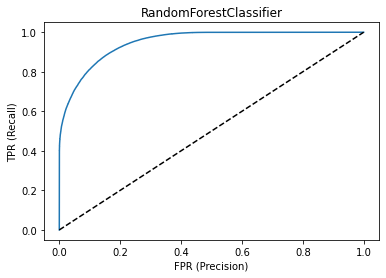

In [63]:
 #performance and evaluation
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,rf_model_probability)

plt.title('RandomForestClassifier')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[55470 11412]
 [ 6701 60177]]


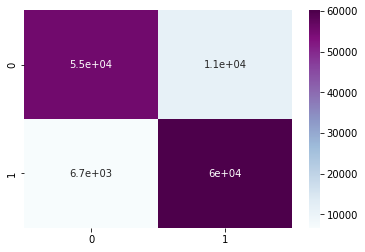

In [64]:
# Confusion matrix useful to find how many values are classified correctly
cm=confusion_matrix(y_test,rf_bayestest_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# **XGBoost Classifier**

In [65]:
#hyper parameter tuning
xgb_model=xgb.XGBClassifier()
#xgb = XGBoostClassifier()
#Cross validation and hyperparameter tuning
xgb_bayes = BayesSearchCV(estimator= xgb_model,
                         search_spaces = {
                          'max_depth': Integer(2,100),
                          'min_samples_leaf': Integer(1,100),
                          'min_samples_split': Integer(2,100),
                          'n_estimators': Integer(1,140),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=4)

xgb_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=73, max_features=log2, min_samples_leaf=99, min_samples_split=98, n_estimators=68; total time= 6.9min
[CV] END max_depth=73, max_features=log2, min_samples_leaf=99, min_samples_split=98, n_estimators=68; total time= 6.9min
[CV] END max_depth=73, max_features=log2, min_samples_leaf=99, min_samples_split=98, n_estimators=68; total time= 6.8min
[CV] END max_depth=73, max_features=log2, min_samples_leaf=99, min_samples_split=98, n_estimators=68; total time= 6.8min
[CV] END max_depth=73, max_features=log2, min_samples_leaf=99, min_samples_split=98, n_estimators=68; total time= 6.8min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=98, min_samples_split=53, n_estimators=86; total time= 4.2min
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=98, min_samples_split=53, n_estimators=86; total time= 4.2min
[CV] END max_depth=30, max_features

BayesSearchCV(cv=5, estimator=XGBClassifier(), n_iter=4, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=140, prior='uniform', transform='normalize')},
              verbose=2)

In [66]:
xgb_bayes.best_params_

OrderedDict([('max_depth', 37),
             ('max_features', 'sqrt'),
             ('min_samples_leaf', 14),
             ('min_samples_split', 51),
             ('n_estimators', 85)])

In [67]:
xgb_bayes.best_estimator_

XGBClassifier(max_depth=37, max_features='sqrt', min_samples_leaf=14,
              min_samples_split=51, n_estimators=85)

In [68]:
xgbtest_pred=xgb_bayes.best_estimator_.predict(X_test)

In [69]:
xgb_model_probability = rf_bayes.best_estimator_.predict_proba(X_test)[:,1]

In [70]:
# evaluating the model on the following metrics.
accu_xgb_hp = accuracy_score(y_test,xgbtest_pred)
recall_xgb_hp= recall_score(y_test,xgbtest_pred)
prec_xgb_hp = precision_score(y_test,xgbtest_pred)
f1score_xgb_hp=f1_score(y_test,xgbtest_pred)

#print accuracy ,classification report and confusion matrix  values of model.

print(accuracy_score(y_test, xgbtest_pred)*100)
print(classification_report(y_test, xgbtest_pred))
print("Confusion matrix\n", confusion_matrix(y_test, xgbtest_pred))

90.39623205741627
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     66882
           1       0.89      0.92      0.91     66878

    accuracy                           0.90    133760
   macro avg       0.90      0.90      0.90    133760
weighted avg       0.90      0.90      0.90    133760

Confusion matrix
 [[59385  7497]
 [ 5349 61529]]


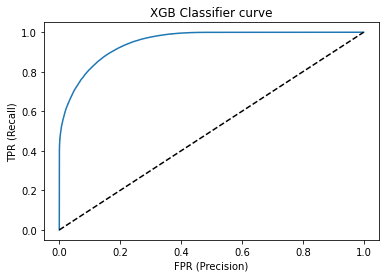

In [71]:
# performance and evaluation
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,xgb_model_probability)

plt.title('XGB Classifier curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[59385  7497]
 [ 5349 61529]]


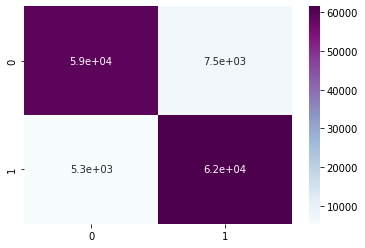

In [72]:
# Confusion matrix useful to find how many values are classified correctly
cm=confusion_matrix(y_test,xgbtest_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# **Comparing The Model After Hyperparameter Tuning**

In [73]:
## Comparing the performance of the models
ind=['Randomforest','XGBClassifier']
df={"Accuracy":[accu_rf_hp,accu_xgb_hp],"Recall":[recall_rf_hp,recall_xgb_hp],"Precision":[prec_rf_hp,prec_xgb_hp],'f1_score':[f1score_rf_hp,f1score_xgb_hp]}
result=pd.DataFrame(data=df,index=ind)
result

,Accuracy,Recall,Precision,f1_score
Randomforest,0.864586,0.899803,0.840590,0.869189
XGBClassifier,0.903962,0.920019,0.891389,0.905477


# **Concusion**



*   The given dataset is an imbalance problem as the Response variable with the value 1 is significantly lower than the value zero
*  The male customers own slightly more vehicles and they are more tend to buy insurance in comparison to their female counterparts.
*   Customers of aged between 30 to 60 are more likely to buy insurance.wheras Youngsters under 30 are not intrigued by vehicle insurance. Reasons could be the absence of involvement, less awareness about insurance and they may not have costly vehicles yet.

*   the customers who have driving licences will option for insurance instead of those who don’t have it
*   Consumers with 1-2-year-old vehicles are more interested in buying insurance. as compared to Consumers with less than 1-year-old Vehicles

*   Customers with Vehicle_Damage are likely to buy insurance as they have experienced the expenditure in repairing vehicles The variable such as Age, Previously_insured, Annual_premium is more affecting the target variable.
*   We used different type of algorithms to train our model like, Logistic Regression, Random Forest model, Decision tree and XGB Classifier. And Also we tuned the parameters of XGB Classifier and Random Forest model Comparing the model on the basis of precision,recall, accuracy ,F1 score we can see that the XGBClassifier model performs better.Even comparing ROC curve XGB Classifier performed better because curves closer to the top-left corner indicate better performance.